In [ ]:
%%capture
!pip install category_encoders==2.* #For Ordinal and OneHotEnc
!pip install xgboost==1.3.2

In [ ]:
# mounting your google drive on colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#change your working directory, if you want to or have already saved your kaggle dataset on google drive.
%cd /content/gdrive/My Drive/Kaggle/Diabetes
# update it to your folder location on drive that contians the dataset and/or kaggle API token json file.

/content/gdrive/My Drive/Kaggle/Diabetes


In [ ]:
# List all files in your Kaggle folder on your google drive.
!ls

diabetes_prediction_dataset.csv


In [ ]:
# Imports
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt



In [ ]:



df = pd.read_csv('diabetes_prediction_dataset.csv')

# df.index.names = ['date_reported']
# df.sort_values('date_reported', inplace=True)

# df = df.rename(columns={'Company': 'company', 'Amount' :'amount', 'lead_investors': 'lead_investors', 'Valuation' :'valuation', 'Industry': 'industry'})



df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.shape


(100000, 9)

In [ ]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
df.value_counts(normalize=True)

gender  age   hypertension  heart_disease  smoking_history  bmi    HbA1c_level  blood_glucose_level  diabetes
Female  80.0  0             0              No Info          27.32  6.2          90                   0           0.00009
                                                                   6.5          159                  0           0.00009
                                                                   4.0          85                   0           0.00008
                                                                   6.6          155                  0           0.00007
                                                                   4.5          140                  0           0.00007
                                                                                                                  ...   
        48.0  0             0              never            27.32  6.6          200                  0           0.00001
                                           

In [ ]:
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.index

RangeIndex(start=0, stop=100000, step=1)

In [ ]:
df['diabetes'].value_counts(normalize=True)


0    0.915
1    0.085
Name: diabetes, dtype: float64

In [ ]:
df.describe(include=['object'])

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [ ]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [ ]:
df['gender'].value_counts(normalize=True)

Female    0.58552
Male      0.41430
Other     0.00018
Name: gender, dtype: float64

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
target = 'diabetes'
X = df.drop(columns=target)
y = df[target]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

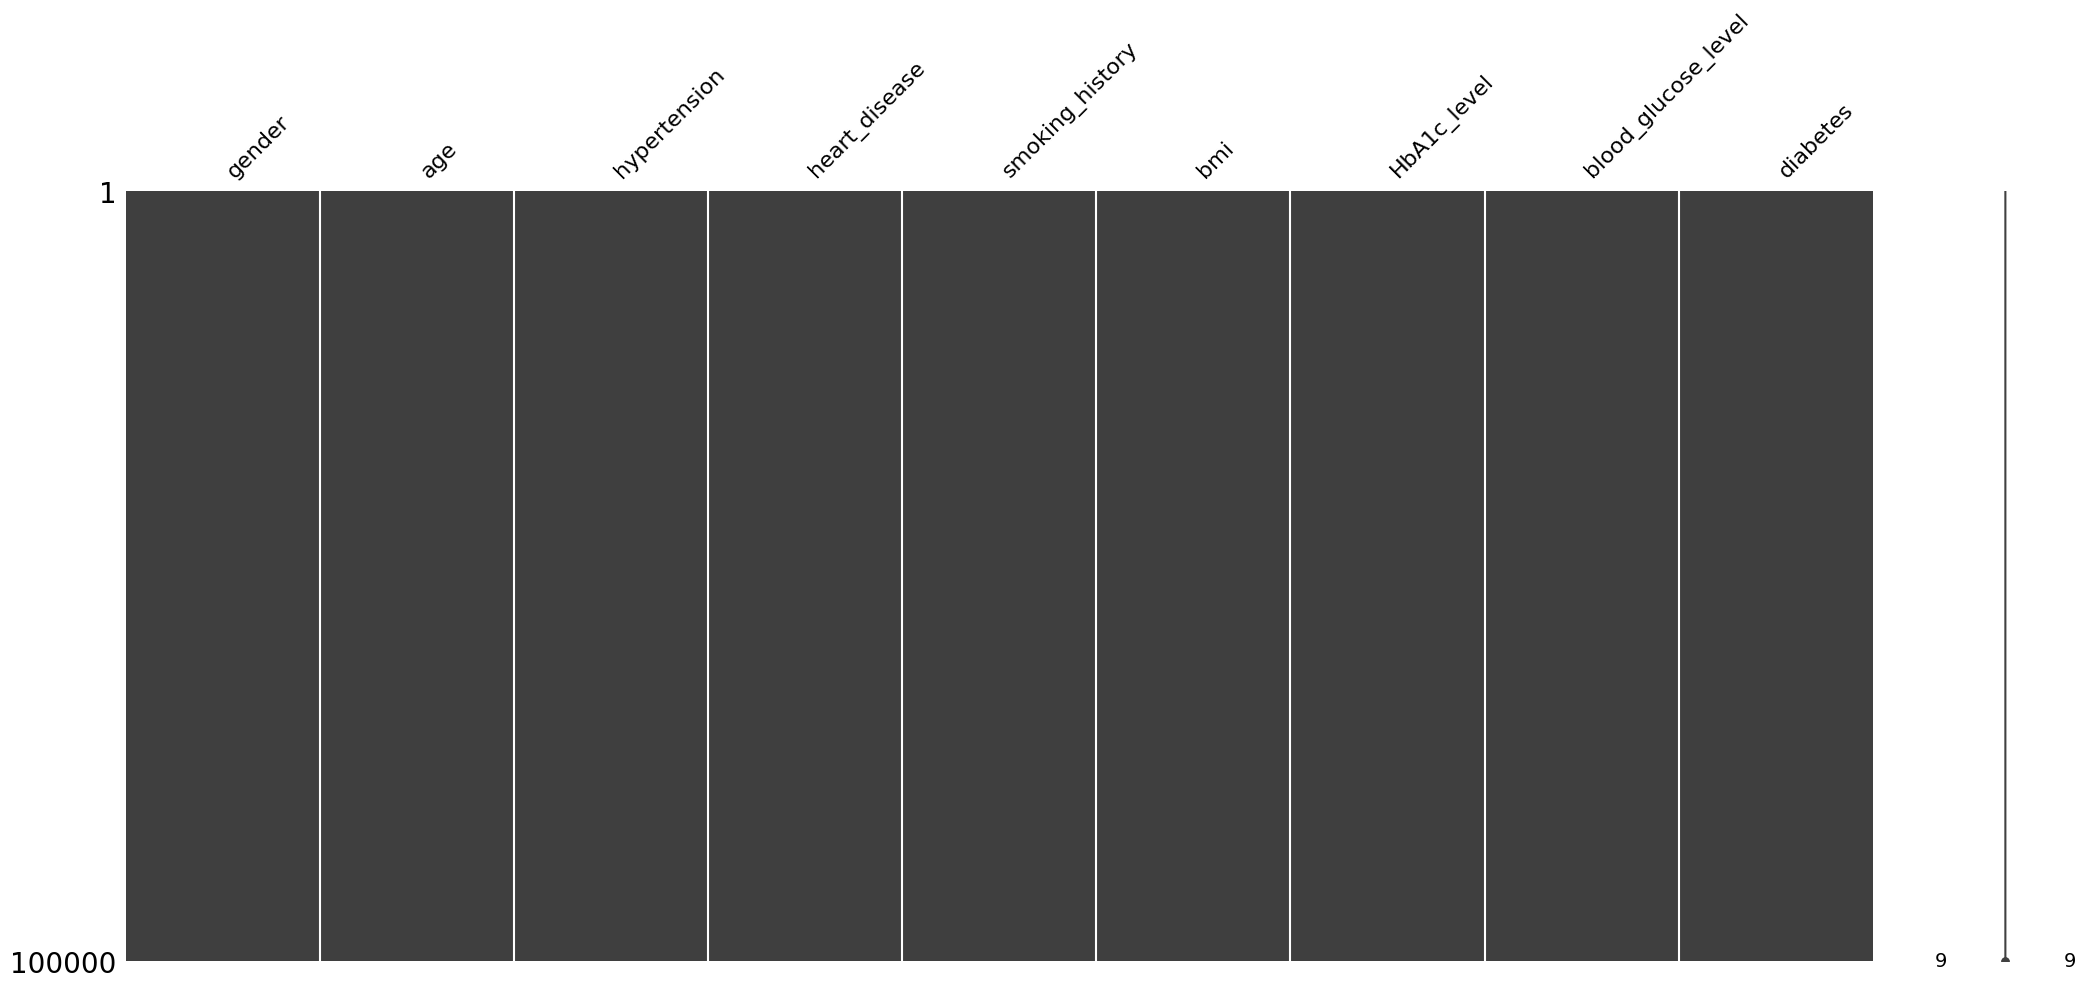

In [ ]:
import missingno as msno
msno.matrix(df)

plt.show()

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

numeric_features = ['age', 'hypertension', 'heart_disease',
       'bmi', 'HbA1c_level', 'blood_glucose_level']

numeric_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['gender','smoking_history']

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier', DecisionTreeClassifier())])

In [ ]:
model_linear = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    StandardScaler(with_mean=False),
    LinearRegression()
    )
model_linear.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [ ]:
model_tree = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    StandardScaler(with_mean=False),
    RandomForestClassifier()
    )
model_tree.fit(X_train,y_train)


Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
print('Bagging Model')
print('Training accuracy:', model_linear.score(X_train, y_train))
print('Validation accuracy:', model_linear.score(X_test, y_test))
print()
print('Boosting Model')
print('Training accuracy:', model_tree.score(X_train, y_train))
# print('Validation accuracy:', model_tree.score(X_test, y_test))

Bagging Model
Training accuracy: 0.6503570638739248


ValueError: ignored

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# # Combine train, validation, and test sets for preprocessing
# combined_data = pd.concat([X_train, X_val, X_test])

# # Assuming categorical_features contains the names of categorical columns
# categorical_features = ['gender','smoking_history']  # Replace with your categorical column names

# # Apply one-hot encoding to categorical features
# encoder = OneHotEncoder(handle_unknown='ignore')
# encoded_data = encoder.fit_transform(combined_data[categorical_features])

# # Convert the encoded data back to DataFrames with column names
# encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_features))

# # Split the combined encoded data back into train, validation, and test sets
# X_train_encoded = encoded_df.iloc[:len(X_train)]
# X_val_encoded = encoded_df.iloc[len(X_train): len(X_train) + len(X_val)]
# X_test_encoded = encoded_df.iloc[len(X_train) + len(X_val):]

# # Ensure consistent columns across all sets
# X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, axis=1, fill_value=0)
# X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, axis=1, fill_value=0)


In [ ]:
# target = 'diabetes'
# X = df.drop(columns=target)
# y = df[target]



# from sklearn.preprocessing import LabelEncoder
# label_enc = LabelEncoder()
# y = label_enc.fit_transform(y)

In [ ]:
X = df.drop('diabetes', axis=1)

# Create and encode the target array
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
y = label_enc.fit_transform(df['diabetes'])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)

In [ ]:
X['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [ ]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
39689,Female,80.00,0,0,No Info,30.78,6.0,140
83601,Female,80.00,0,0,never,25.68,4.5,159
1371,Female,80.00,1,0,never,28.12,5.8,145
28840,Male,0.32,0,0,No Info,14.70,5.7,140
32720,Male,5.00,0,0,No Info,17.79,3.5,158
...,...,...,...,...,...,...,...,...
32231,Female,12.00,0,0,No Info,22.64,3.5,155
96487,Female,80.00,0,0,former,24.06,9.0,220
20095,Male,64.00,0,0,former,35.30,6.6,145
30376,Female,66.00,0,0,never,25.28,8.2,126


In [ ]:
clf.fit(X_train, y_train)
print('Validation Accuracy', clf.score(X_test, y_test))


Validation Accuracy 0.95075


In [ ]:
features_order = numeric_features + categorical_features

importances = pd.Series(clf.steps[1][1].feature_importances_, features_order)

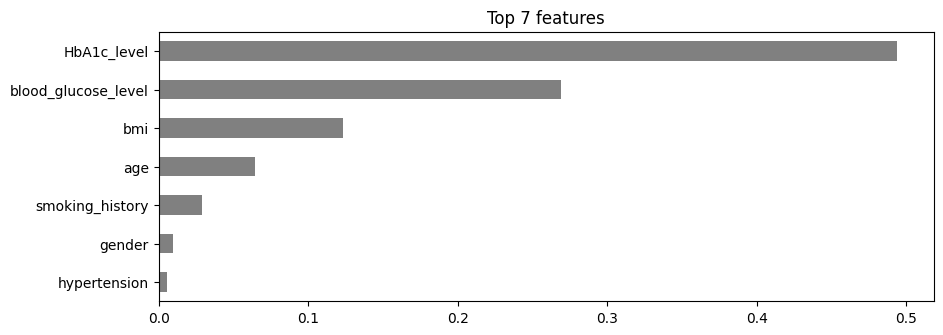

In [ ]:
n = 7
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')

plt.show()

# New Section

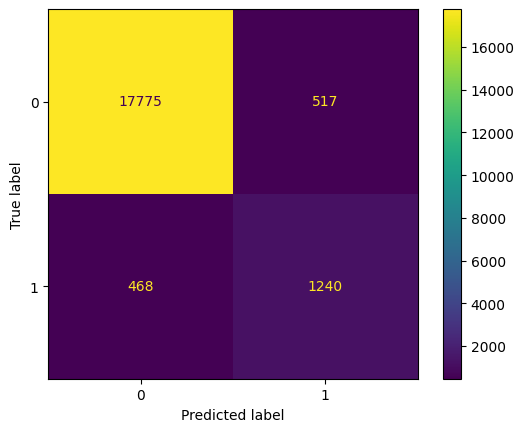

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18292
           1       0.71      0.73      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.84     20000
weighted avg       0.95      0.95      0.95     20000



# New Section

In [ ]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
39689,Female,80.00,0,0,No Info,30.78,6.0,140
83601,Female,80.00,0,0,never,25.68,4.5,159
1371,Female,80.00,1,0,never,28.12,5.8,145
28840,Male,0.32,0,0,No Info,14.70,5.7,140
32720,Male,5.00,0,0,No Info,17.79,3.5,158
...,...,...,...,...,...,...,...,...
32231,Female,12.00,0,0,No Info,22.64,3.5,155
96487,Female,80.00,0,0,former,24.06,9.0,220
20095,Male,64.00,0,0,former,35.30,6.6,145
30376,Female,66.00,0,0,never,25.28,8.2,126


In [ ]:
logreg_classifier = LogisticRegression().fit(X_train,y_train)
y_pred_prob = logreg_classifier.predict_proba(X_test)[:,1]

ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

y_pred_prob = logreg_classifier.predict_proba(X_test)[:,1]

# Create the data for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# See the results in a table
roccurve_df = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr,
    'Threshold': thresholds
    })

roccurve_df.head()

#Permuted Values


In [ ]:
df.columns

In [ ]:
# Permute the values in the more important column
feature = 'HbA1c_level'
X_test_permuted = X_test.copy()

# Fill in missing values
X_test_permuted[feature].fillna(value=X_test_permuted[feature].median(), inplace=True)

# Permute
X_test_permuted[feature] = np.random.permutation(X_test[feature])

print('Feature permuted: ', feature)
print('Validation Accuracy,', clf.score(X_test,y_test))
print('Validation Accuracy (permuted),', clf.score(X_test_permuted,y_test))

In [ ]:
# Permute the values in a less important column
feature = 'hypertension'
X_test_permuted = X_test.copy()

# Fill in missing values
X_test_permuted[feature].fillna(value = X_test_permuted[feature].median(), inplace=True)

# Permute
X_test_permuted[feature] = np.random.permutation(X_test[feature])

print('Feature permuted: ', feature)
print('Validation Accuracy', clf.score(X_test, y_test))
print('Validation Accuracy (permuted)', clf.score(X_test_permuted, y_test))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.5, random_state=42)
ada_classifier.fit(X_train,y_train)

In [ ]:
from xgboost import XGBClassifier

xg_classifier = XGBClassifier(n_estimators=50, random_state=42, eval_metric='merror')

xg_classifier.fit(X_train,y_train)

print('Validation Accuracy: Adaboost', xg_classifier.score(X_test, y_test))